In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("survey_results_public.csv")
df.head()

df = df[["Country", "EdLevel", "YearsCodePro", "Employment", "ConvertedCompYearly"]]
df = df.rename({"ConvertedCompYearly": "Salary"}, axis=1)
df.head()

,Country,EdLevel,YearsCodePro,Employment,Salary
0,NaN,NaN,NaN,NaN,NaN
1,Canada,NaN,NaN,"Employed, full-time",NaN
2,United Kingdom of Great Britain and Northern I...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5,"Employed, full-time",40205.0
3,Israel,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",17,"Employed, full-time",215232.0
4,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",3,"Employed, full-time",NaN


In [57]:
df = df[df["Salary"].notnull()]
df.head()


,Country,EdLevel,YearsCodePro,Employment,Salary
2,United Kingdom of Great Britain and Northern I...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5,"Employed, full-time",40205.0
3,Israel,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",17,"Employed, full-time",215232.0
8,Netherlands,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",6,"Employed, full-time",49056.0
10,United Kingdom of Great Britain and Northern I...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2,"Employed, full-time",60307.0
11,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",10,"Employed, full-time;Independent contractor, fr...",194400.0


In [58]:
df = df.dropna()
df.isnull().sum()

Country         0
EdLevel         0
YearsCodePro    0
Employment      0
Salary          0
dtype: int64

In [59]:
df.info()
df = df[df["Employment"] == "Employed, full-time"]
df = df.drop("Employment", axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37919 entries, 2 to 73121
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       37919 non-null  object 
 1   EdLevel       37919 non-null  object 
 2   YearsCodePro  37919 non-null  object 
 3   Employment    37919 non-null  object 
 4   Salary        37919 non-null  float64
dtypes: float64(1), object(4)
memory usage: 1.7+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 31382 entries, 2 to 73121
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       31382 non-null  object 
 1   EdLevel       31382 non-null  object 
 2   YearsCodePro  31382 non-null  object 
 3   Salary        31382 non-null  float64
dtypes: float64(1), object(3)
memory usage: 1.2+ MB


In [60]:
df["Country"].value_counts()

United States of America                                7858
Germany                                                 2382
United Kingdom of Great Britain and Northern Ireland    2341
India                                                   1869
Canada                                                  1249
                                                        ... 
Haiti                                                      1
Zambia                                                     1
Suriname                                                   1
Somalia                                                    1
Seychelles                                                 1
Name: Country, Length: 155, dtype: int64

In [61]:
#Removing Countries which has less data points
def shorten_categories(categories, cutoff):
    categoryMap = {}
    for i in range(len(categories)):
        if(categories.values[i] >= cutoff):
            categoryMap[categories.index[i]] = categories.index[i]
        else:
            categoryMap[categories.index[i]] = 'Other'
    return categoryMap

In [62]:
country_map = shorten_categories(df.Country.value_counts(), 400)
print(country_map)
df["Country"] = df["Country"].map(country_map)
df["Country"].value_counts()

{'United States of America': 'United States of America', 'Germany': 'Germany', 'United Kingdom of Great Britain and Northern Ireland': 'United Kingdom of Great Britain and Northern Ireland', 'India': 'India', 'Canada': 'Canada', 'France': 'France', 'Brazil': 'Brazil', 'Spain': 'Spain', 'Netherlands': 'Netherlands', 'Australia': 'Australia', 'Italy': 'Italy', 'Poland': 'Poland', 'Sweden': 'Sweden', 'Russian Federation': 'Russian Federation', 'Switzerland': 'Switzerland', 'Turkey': 'Other', 'Israel': 'Other', 'Austria': 'Other', 'Norway': 'Other', 'Portugal': 'Other', 'Denmark': 'Other', 'Belgium': 'Other', 'Finland': 'Other', 'Mexico': 'Other', 'New Zealand': 'Other', 'Greece': 'Other', 'South Africa': 'Other', 'Pakistan': 'Other', 'Czech Republic': 'Other', 'Iran, Islamic Republic of...': 'Other', 'Argentina': 'Other', 'Romania': 'Other', 'Ireland': 'Other', 'Ukraine': 'Other', 'Hungary': 'Other', 'Japan': 'Other', 'Bangladesh': 'Other', 'Colombia': 'Other', 'China': 'Other', 'Bulgaria

Other                                                   8643
United States of America                                7858
Germany                                                 2382
United Kingdom of Great Britain and Northern Ireland    2341
India                                                   1869
Canada                                                  1249
France                                                  1126
Brazil                                                  1014
Spain                                                    858
Netherlands                                              701
Australia                                                700
Italy                                                    667
Poland                                                   572
Sweden                                                   561
Russian Federation                                       425
Switzerland                                              416
Name: Country, dtype: in

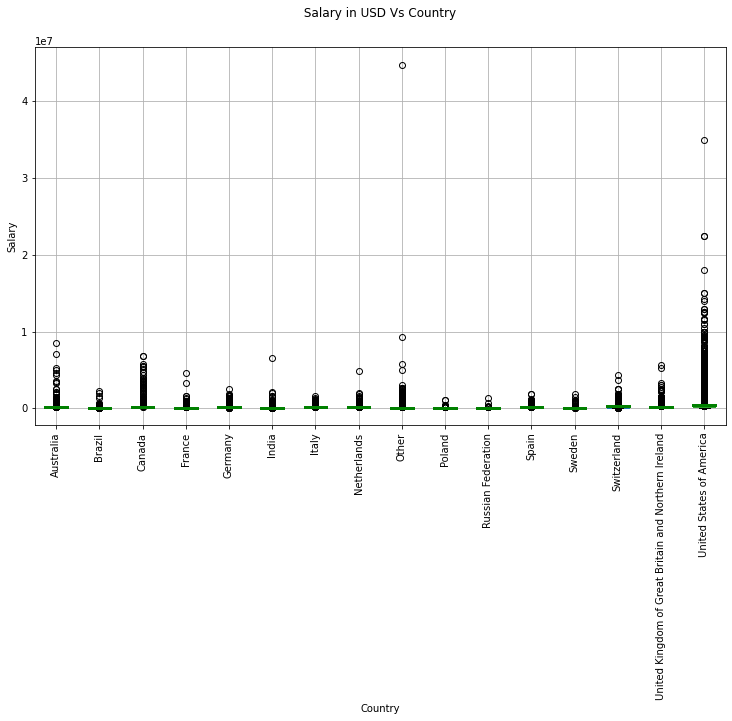

In [63]:
#BoxPlot with salary Vs countries


fig,ax = plt.subplots(1,1,figsize =(12,7))

# Define the properties of the mean bar
meanlineprops = dict(linestyle='--', linewidth=3, color='red')
meanprops = dict(linestyle='-', linewidth=3, color='green')


df.boxplot("Salary","Country", ax,  meanline=True, showmeans=True, meanprops=meanprops)
plt.suptitle(" Salary in USD Vs Country ")
plt.title("")
plt.ylabel('Salary')
plt.xticks(rotation = 90)

plt.show()

In [64]:
df = df[df["Salary"] <= 350000]
df = df[df["Salary"] >= 10000]
df = df[df["Country"] != 'Other']
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20422 entries, 2 to 73121
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       20422 non-null  object 
 1   EdLevel       20422 non-null  object 
 2   YearsCodePro  20422 non-null  object 
 3   Salary        20422 non-null  float64
dtypes: float64(1), object(3)
memory usage: 797.7+ KB


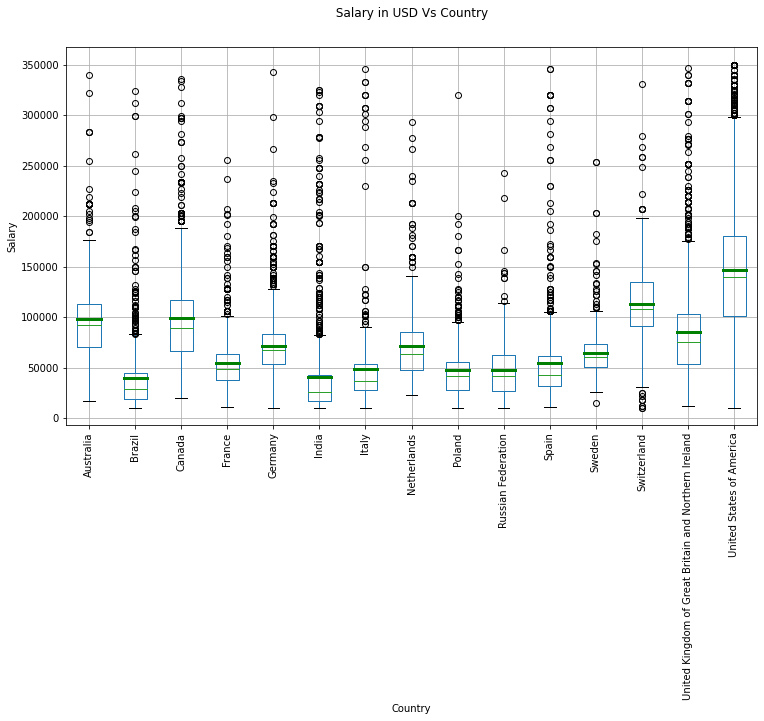

In [65]:
#BoxPlot with salary Vs countries


fig,ax = plt.subplots(1,1,figsize =(12,7))

# Define the properties of the mean bar
meanlineprops = dict(linestyle='--', linewidth=3, color='red')
meanprops = dict(linestyle='-', linewidth=3, color='green')


df.boxplot("Salary","Country", ax,  meanline=True, showmeans=True, meanprops=meanprops)
plt.suptitle(" Salary in USD Vs Country ")
plt.title("")
plt.ylabel('Salary')
plt.xticks(rotation = 90)

plt.show()

In [66]:
df["YearsCodePro"].unique()

array(['5', '6', '2', '4', '20', '9', '14', '21', '15', '25', '3', '10',
       '8', '12', '7', '19', '17', '24', '1', '11', '23',
       'Less than 1 year', '18', '37', '46', '22', '32', '40', '13', '27',
       '28', '16', '31', '34', '35', '26', '42', '38', '30', '36', '29',
       '41', '33', '39', '48', '45', '44', '43', 'More than 50 years',
       '47', '49', '50'], dtype=object)

In [67]:
#Convert years of experience to float 
def convertExperienceToNum(x):
    if x == 'More than 50 years':
        return 50
    elif x == 'Less than 1 year':
        return 0.5
    return float(x)

df["YearsCodePro"] = df["YearsCodePro"].apply(convertExperienceToNum)
df["YearsCodePro"].unique()

array([ 5. ,  6. ,  2. ,  4. , 20. ,  9. , 14. , 21. , 15. , 25. ,  3. ,
       10. ,  8. , 12. ,  7. , 19. , 17. , 24. ,  1. , 11. , 23. ,  0.5,
       18. , 37. , 46. , 22. , 32. , 40. , 13. , 27. , 28. , 16. , 31. ,
       34. , 35. , 26. , 42. , 38. , 30. , 36. , 29. , 41. , 33. , 39. ,
       48. , 45. , 44. , 43. , 50. , 47. , 49. ])

In [68]:
df["EdLevel"].unique()

array(['Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Bachelor’s degree (B.A., B.S., B.Eng., etc.)', 'Something else',
       'Associate degree (A.A., A.S., etc.)',
       'Some college/university study without earning a degree',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Professional degree (JD, MD, etc.)',
       'Other doctoral degree (Ph.D., Ed.D., etc.)',
       'Primary/elementary school'], dtype=object)

In [69]:
def simplifyEducationLeve(x):
    if "Bachelor’s degree" in x:
        return "Bachelor’s degree"
    elif "Master’s degree" in x:
        return "Master’s degree"
    elif "Professional degree" in x or "Other doctoral degree" in x:
        return "Post grad"
    return "Less than a Bachelors"

df["EdLevel"] = df["EdLevel"].apply(simplifyEducationLeve)
df["EdLevel"].unique()

array(['Master’s degree', 'Bachelor’s degree', 'Less than a Bachelors',
       'Post grad'], dtype=object)

In [70]:
#Convert string data to unique num value for Education and Country
from sklearn.preprocessing import LabelEncoder
labelEncode_education = LabelEncoder()
df["EdLevel"] = labelEncode_education.fit_transform(df["EdLevel"])
print(df["EdLevel"].unique())

print(df["Country"].unique())
labelEncode_country = LabelEncoder()
df["Country"] = labelEncode_country.fit_transform(df["Country"])
print(df["Country"].unique())

[2 0 1 3]
['United Kingdom of Great Britain and Northern Ireland' 'Netherlands'
 'United States of America' 'Italy' 'Canada' 'Germany' 'Poland' 'France'
 'Brazil' 'Sweden' 'Spain' 'India' 'Switzerland' 'Australia'
 'Russian Federation']
[13  7 14  6  2  4  8  3  1 11 10  5 12  0  9]


In [71]:
x = df.drop("Salary", axis = 1)
y = df["Salary"]

df.head()

,Country,EdLevel,YearsCodePro,Salary
2,13,2,5.0,40205.0
8,7,2,6.0,49056.0
10,13,0,2.0,60307.0
12,14,0,5.0,65000.0
21,6,2,4.0,34126.0


In [72]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(x,y.values)

LinearRegression()

In [73]:
y_pred = linear_reg.predict(x)

In [74]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

error = np.sqrt(mean_squared_error(y, y_pred))

In [75]:
error

53059.994087947525

In [76]:
from sklearn.tree import DecisionTreeRegressor
decTree_reg = DecisionTreeRegressor(random_state=0)
decTree_reg.fit(x,y.values)

DecisionTreeRegressor(random_state=0)

In [77]:
y_pred_dt = decTree_reg.predict(x)

In [78]:
error = np.sqrt(mean_squared_error(y,y_pred_dt))
print("${:,.02f}".format(error))

$42,441.22


In [79]:
from sklearn.ensemble import RandomForestRegressor
random_forest_reg = RandomForestRegressor(random_state=0)
random_forest_reg.fit(x,y.values)

RandomForestRegressor(random_state=0)

In [80]:
y_pred_rr = random_forest_reg.predict(x)

In [81]:
error = np.sqrt(mean_squared_error(y,y_pred_rr))
print("${:,.02f}".format(error))

$42,519.33


In [82]:
from sklearn.model_selection import GridSearchCV
max_depth = [None, 2, 4, 6, 8, 10, 12]
parameters = {"max_depth" : max_depth}

regressor = DecisionTreeRegressor(random_state=0)
gs = GridSearchCV(regressor, parameters, scoring = 'neg_mean_squared_error' )
gs.fit(x, y.values)

GridSearchCV(estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': [None, 2, 4, 6, 8, 10, 12]},
             scoring='neg_mean_squared_error')

In [83]:
regressor = gs.best_estimator_

regressor.fit(x, y.values)
ypred = regressor.predict(x)
error = np.sqrt(mean_squared_error(y,ypred))
print("${:,.02f}".format(error))

$43,873.86


In [84]:
x

,Country,EdLevel,YearsCodePro
2,13,2,5.0
8,7,2,6.0
10,13,0,2.0
12,14,0,5.0
21,6,2,4.0
...,...,...,...
73113,14,2,5.0
73116,14,0,16.0
73119,14,0,1.0
73120,10,0,2.0


In [90]:
# country, edlevel, yearsCode
x = np.array([["United States of America", "Master’s degree", 15]])
x

array([['United States of America', 'Master’s degree', '15']],
      dtype='<U24')

In [91]:
x[:,0] = labelEncode_country.transform(x[:,0])
x[:,1] = labelEncode_education.transform(x[:,1])
x = x.astype(float)
x

array([[14.,  2., 15.]])

In [92]:
y_pred_reg = regressor.predict(x)
y_pred_reg

C:\Users\pravandu\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([178734.27835052])

In [93]:
import pickle

In [95]:
data = {"model": regressor, "labelEncode_country": labelEncode_country , "labelEncode_education": labelEncode_education}
with open("saved_steps.pk1" ,"wb") as file:
    pickle.dump(data,file)

In [96]:
with open("saved_steps.pk1" ,"rb") as file:
    data = pickle.load(file)
    
regressor_loaded = data["model"]
labelEncode_country = data["labelEncode_country"]
labelEncode_education = data["labelEncode_education"]

In [97]:
y_pred1 = regressor_loaded.predict(x)
y_pred1

C:\Users\pravandu\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([178734.27835052])